In [10]:
import networkx as nx
from node2vec import Node2Vec
import matplotlib.pyplot as plt
from matplotlib import cm
from ge import SDNE

#plt.figure(figsize=(100,100), dpi=1)
plt.rcParams['figure.dpi'] = 40
plt.rcParams['figure.figsize'] = [200, 200]


nodes_u = set()
nodes_v = set()
weight_edges = list()
edgeDict=dict()

G = nx.Graph()
#with open("../HoloScope-master/testdata/yelp.edgelist.inject.2000", encoding='utf-8') as file:
with open("../HoloScope-master/testdata/yelp.edgelist.gz.inject", encoding='utf-8') as file:
    for line in file:
        l = line.split(' ')[0:3]
       
        nodes_u.add('u' + l[0])
        nodes_v.add('v' + l[1])

        weight_edges.append(['u' + l[0], 'v' + l[1], int(l[2])])

nodes = list(nodes_u) + list(nodes_v)
node2index = dict([(node, index) for index, node in enumerate(nodes)])

G = nx.Graph()
G.add_nodes_from([index for index in range(len(nodes_u))], bipartite=0)
G.add_nodes_from([index + len(nodes_u) for index in range(len(nodes_v))], bipartite=1)

for l in weight_edges:
    G.add_edge(node2index[l[0]], node2index[l[1]], weight = l[2])

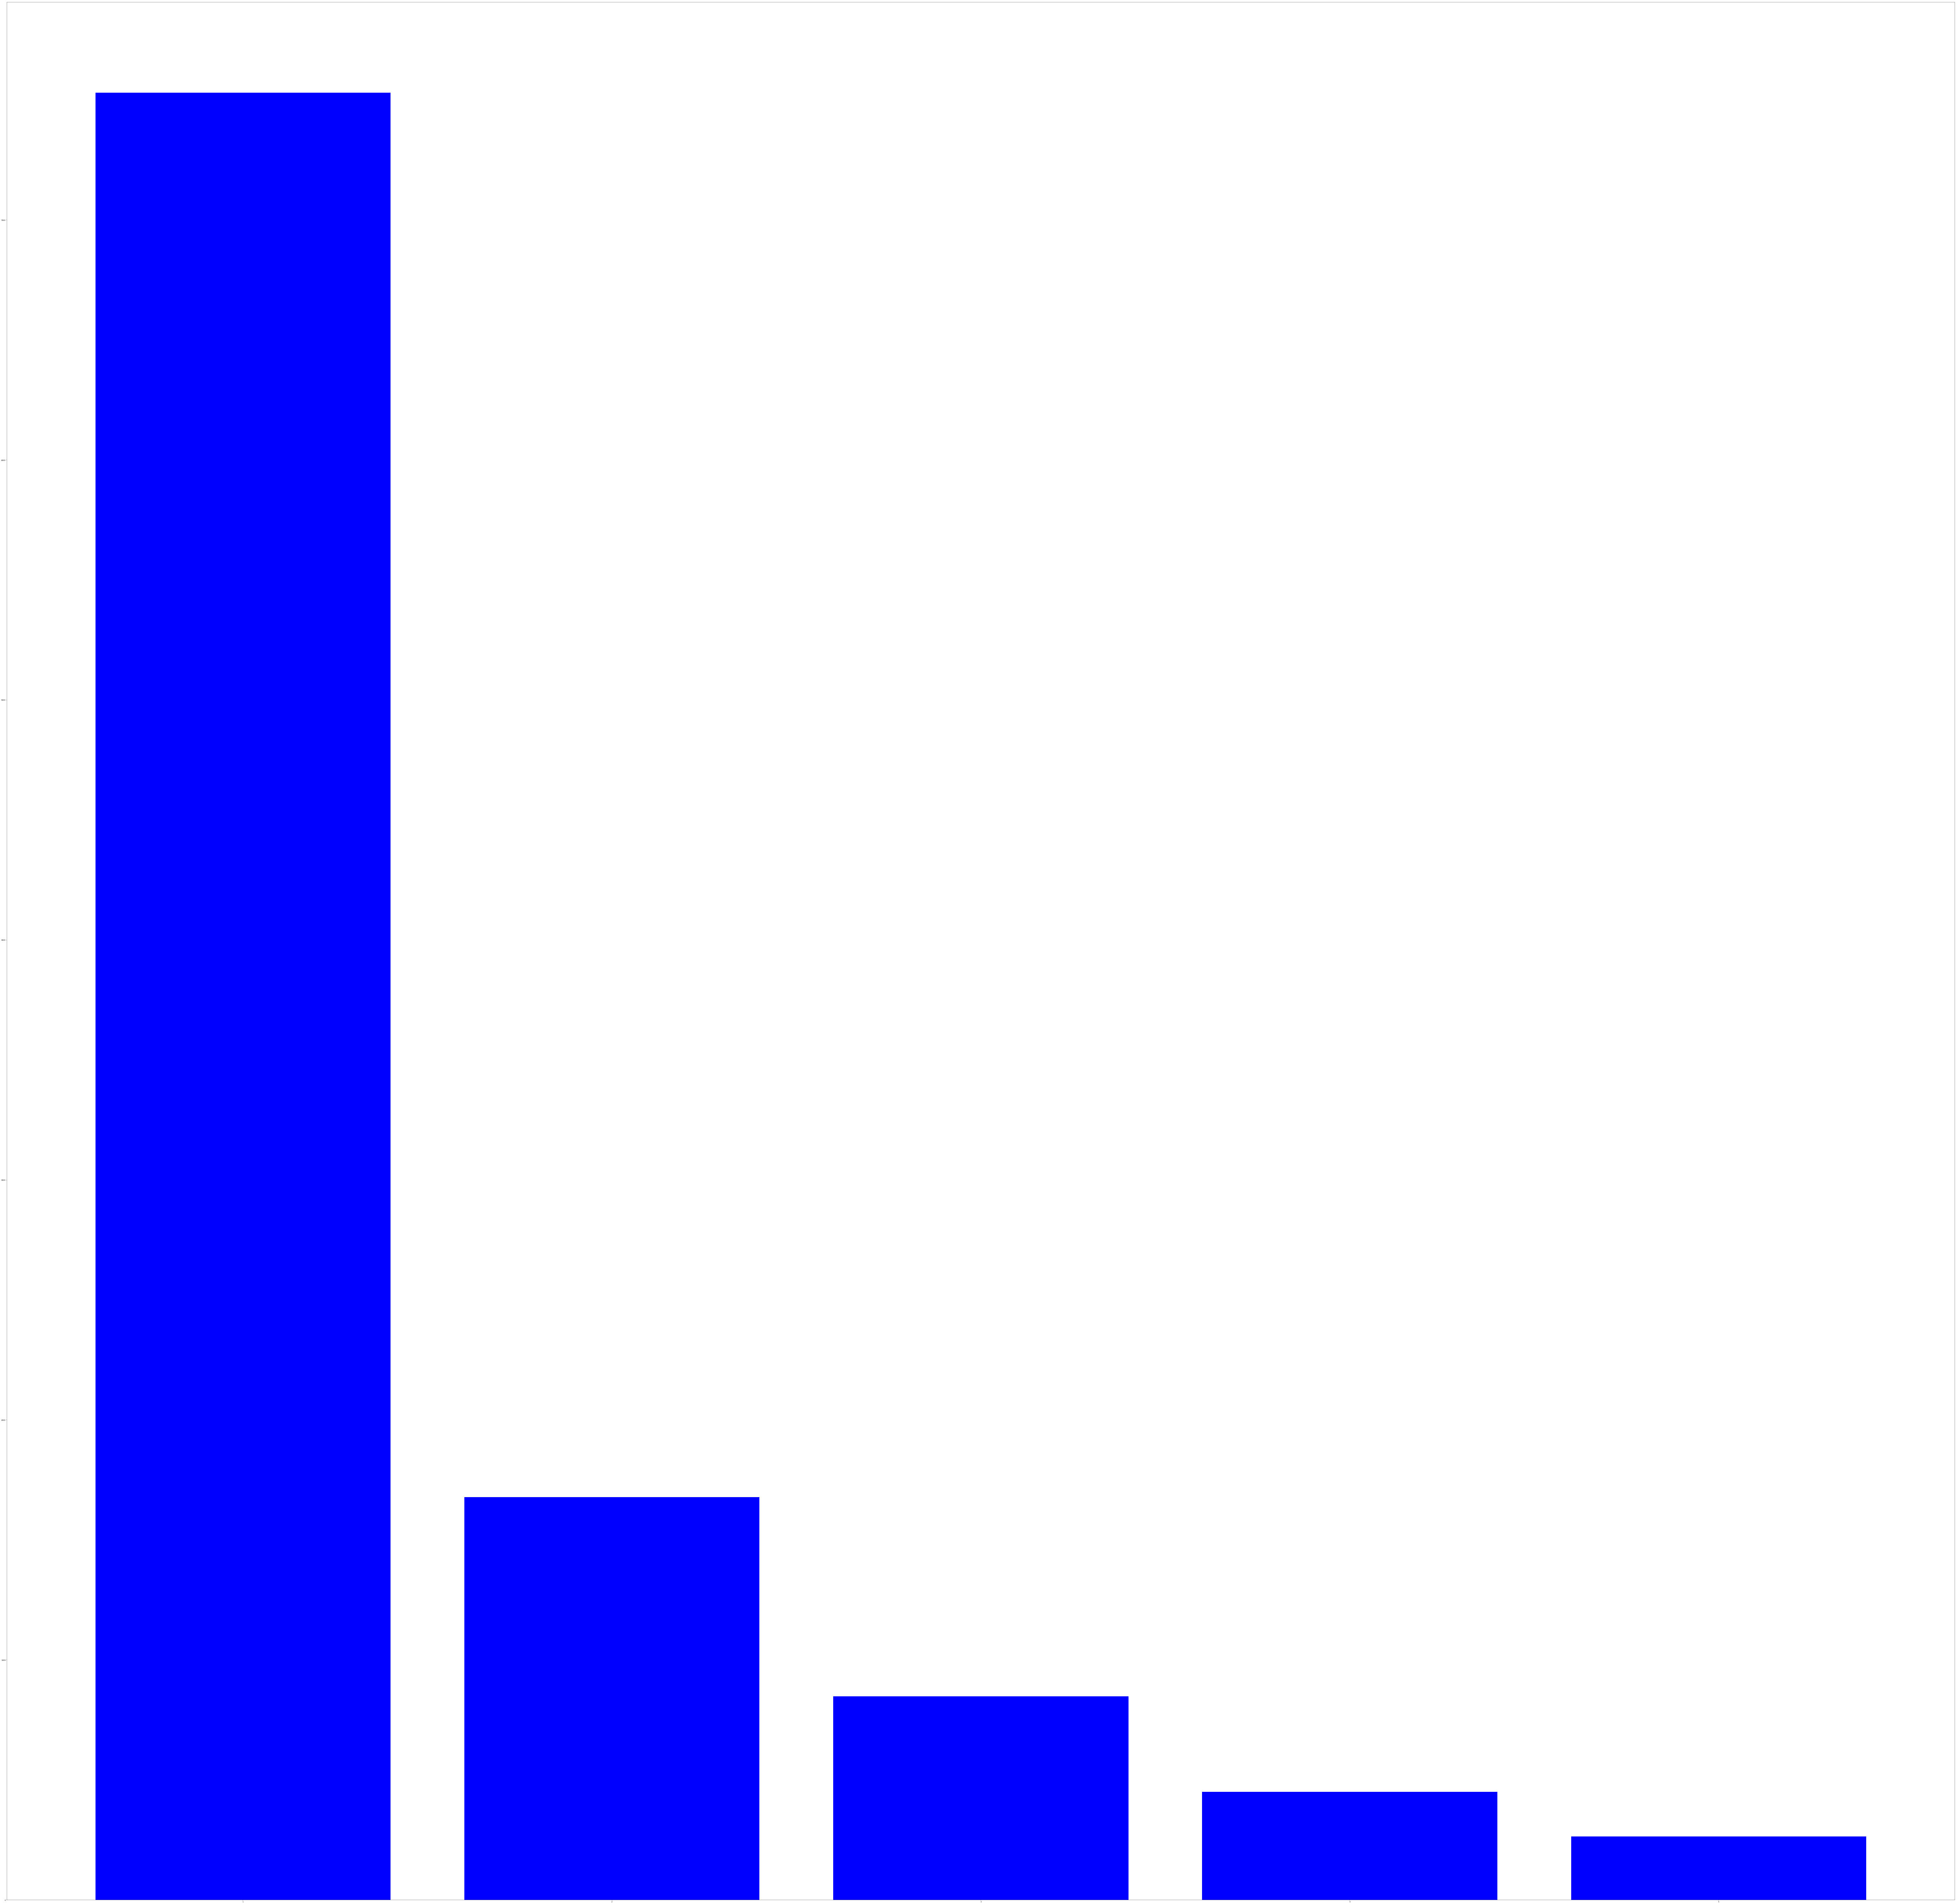

In [11]:
#degree analysis, not weight
import collections
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg[-5:], cnt[-5:], width=0.80, color='b')
plt.show()

In [12]:
#delete the degree under 2
sub_nodes_u = [n for n, d in G.degree([index for index in range(len(nodes_u))]) if d>3]
sub_nodes_v = [n for n, d in G.degree([index + len(nodes_u) for index in range(len(nodes_v))]) if d>3]
sub_nodes = sub_nodes_u +  sub_nodes_v
print(len(sub_nodes))
print(len(nodes))
H = G.subgraph(sub_nodes)

2300
12358


In [13]:
def subgraph_process(G):
    #create a subgraph  for viewing pattern, filtering the small cluster
    nodes_isolate=[]
    for component in nx.connected_components(G):
        if(len(component)< 5):
            nodes_isolate += list(component)
    print("all nodes", len(nodes))
    print("ioslate nodes", len(nodes_isolate))
    nodes_remaining = set(nodes) - set(nodes_isolate)
    H = G.subgraph(nodes_remaining)
    return H

In [14]:
from Graph_Embedding_Sparse.sdne.sdne import SDNE
model = SDNE(G, hidden_size=[128, 10],)
#model = LINE(G, embedding_size=128, order='second')

In [15]:
model.train(batch_size=512, epochs=50, verbose=2)

  0%|          | 0/25 [00:00<?, ?it/s]

use the batch model to run


  8%|▊         | 2/25 [00:00<00:02, 10.37it/s]

Epoch 1/50
3s - loss:  128.3144 - 2nd_loss:  128.1306 - 1st_loss:  0.0000


  8%|▊         | 2/25 [00:00<00:02, 10.44it/s]

Epoch 2/50
2s - loss:  126.8291 - 2nd_loss:  126.7593 - 1st_loss:  0.0000


  8%|▊         | 2/25 [00:00<00:02, 10.08it/s]

Epoch 3/50
2s - loss:  125.1487 - 2nd_loss:  125.0769 - 1st_loss:  0.0000


  8%|▊         | 2/25 [00:00<00:02, 10.45it/s]

Epoch 4/50
2s - loss:  123.2925 - 2nd_loss:  123.2159 - 1st_loss:  0.0000


  8%|▊         | 2/25 [00:00<00:02, 10.48it/s]

Epoch 5/50
2s - loss:  121.1276 - 2nd_loss:  121.0328 - 1st_loss:  0.0000


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 6/50
2s - loss:  118.9419 - 2nd_loss:  118.8188 - 1st_loss:  0.0001


  8%|▊         | 2/25 [00:00<00:02, 10.31it/s]

Epoch 7/50
2s - loss:  117.0023 - 2nd_loss:  116.8567 - 1st_loss:  0.0001


  8%|▊         | 2/25 [00:00<00:02, 10.08it/s]

Epoch 8/50
2s - loss:  115.4523 - 2nd_loss:  115.2934 - 1st_loss:  0.0001


  8%|▊         | 2/25 [00:00<00:02, 10.41it/s]

Epoch 9/50
2s - loss:  114.0901 - 2nd_loss:  113.9255 - 1st_loss:  0.0001


  8%|▊         | 2/25 [00:00<00:02, 10.40it/s]

Epoch 10/50
2s - loss:  113.1343 - 2nd_loss:  112.9675 - 1st_loss:  0.0002


  8%|▊         | 2/25 [00:00<00:02, 10.62it/s]

Epoch 11/50
2s - loss:  112.2014 - 2nd_loss:  112.0323 - 1st_loss:  0.0002


  8%|▊         | 2/25 [00:00<00:02, 10.50it/s]

Epoch 12/50
2s - loss:  111.4290 - 2nd_loss:  111.2579 - 1st_loss:  0.0002


  8%|▊         | 2/25 [00:00<00:02, 10.32it/s]

Epoch 13/50
2s - loss:  110.7539 - 2nd_loss:  110.5805 - 1st_loss:  0.0002


  8%|▊         | 2/25 [00:00<00:02, 10.32it/s]

Epoch 14/50
2s - loss:  110.4191 - 2nd_loss:  110.2407 - 1st_loss:  0.0002


  8%|▊         | 2/25 [00:00<00:02, 10.39it/s]

Epoch 15/50
2s - loss:  110.0335 - 2nd_loss:  109.8521 - 1st_loss:  0.0002


  8%|▊         | 2/25 [00:00<00:02, 10.38it/s]

Epoch 16/50
2s - loss:  109.7546 - 2nd_loss:  109.5685 - 1st_loss:  0.0002


  8%|▊         | 2/25 [00:00<00:02, 10.52it/s]

Epoch 17/50
2s - loss:  109.4730 - 2nd_loss:  109.2817 - 1st_loss:  0.0002


  8%|▊         | 2/25 [00:00<00:02, 10.65it/s]

Epoch 18/50
2s - loss:  109.2304 - 2nd_loss:  109.0349 - 1st_loss:  0.0002


  8%|▊         | 2/25 [00:00<00:02, 10.56it/s]

Epoch 19/50
2s - loss:  109.0914 - 2nd_loss:  108.8923 - 1st_loss:  0.0002


  8%|▊         | 2/25 [00:00<00:02, 10.59it/s]

Epoch 20/50
2s - loss:  108.9216 - 2nd_loss:  108.7192 - 1st_loss:  0.0003


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 21/50
2s - loss:  108.9701 - 2nd_loss:  108.7647 - 1st_loss:  0.0003


  8%|▊         | 2/25 [00:00<00:02, 10.61it/s]

Epoch 22/50
2s - loss:  108.7417 - 2nd_loss:  108.5357 - 1st_loss:  0.0003


  8%|▊         | 2/25 [00:00<00:02, 10.47it/s]

Epoch 23/50
2s - loss:  108.7949 - 2nd_loss:  108.5892 - 1st_loss:  0.0003


  8%|▊         | 2/25 [00:00<00:02, 10.43it/s]

Epoch 24/50
2s - loss:  108.6689 - 2nd_loss:  108.4630 - 1st_loss:  0.0003


  8%|▊         | 2/25 [00:00<00:02, 10.29it/s]

Epoch 25/50
2s - loss:  108.5218 - 2nd_loss:  108.3122 - 1st_loss:  0.0003


  8%|▊         | 2/25 [00:00<00:02, 10.31it/s]

Epoch 26/50
2s - loss:  108.5123 - 2nd_loss:  108.2985 - 1st_loss:  0.0003


  8%|▊         | 2/25 [00:00<00:02, 10.20it/s]

Epoch 27/50
2s - loss:  108.4639 - 2nd_loss:  108.2413 - 1st_loss:  0.0003


  8%|▊         | 2/25 [00:00<00:02, 10.40it/s]

Epoch 28/50
2s - loss:  108.6117 - 2nd_loss:  108.3837 - 1st_loss:  0.0003


  8%|▊         | 2/25 [00:00<00:02, 10.16it/s]

Epoch 29/50
2s - loss:  108.5153 - 2nd_loss:  108.2839 - 1st_loss:  0.0003


  8%|▊         | 2/25 [00:00<00:02, 11.02it/s]

Epoch 30/50
2s - loss:  108.2523 - 2nd_loss:  108.0191 - 1st_loss:  0.0003


  8%|▊         | 2/25 [00:00<00:02, 10.47it/s]

Epoch 31/50
2s - loss:  108.1662 - 2nd_loss:  107.9325 - 1st_loss:  0.0003


  8%|▊         | 2/25 [00:00<00:02, 10.14it/s]

Epoch 32/50
2s - loss:  108.1407 - 2nd_loss:  107.9076 - 1st_loss:  0.0003


  8%|▊         | 2/25 [00:00<00:02, 10.31it/s]

Epoch 33/50
2s - loss:  108.0522 - 2nd_loss:  107.8193 - 1st_loss:  0.0003


  8%|▊         | 2/25 [00:00<00:02, 10.45it/s]

Epoch 34/50
2s - loss:  107.9192 - 2nd_loss:  107.6854 - 1st_loss:  0.0003


  8%|▊         | 2/25 [00:00<00:02, 10.90it/s]

Epoch 35/50
2s - loss:  107.7644 - 2nd_loss:  107.5309 - 1st_loss:  0.0003


  8%|▊         | 2/25 [00:00<00:02, 10.08it/s]

Epoch 36/50
2s - loss:  107.7454 - 2nd_loss:  107.5130 - 1st_loss:  0.0003


  8%|▊         | 2/25 [00:00<00:02, 10.18it/s]

Epoch 37/50
2s - loss:  107.7260 - 2nd_loss:  107.4948 - 1st_loss:  0.0003


  8%|▊         | 2/25 [00:00<00:02, 10.30it/s]

Epoch 38/50
2s - loss:  107.7441 - 2nd_loss:  107.5130 - 1st_loss:  0.0003


  8%|▊         | 2/25 [00:00<00:02, 10.13it/s]

Epoch 39/50
2s - loss:  107.7060 - 2nd_loss:  107.4743 - 1st_loss:  0.0003


  8%|▊         | 2/25 [00:00<00:02, 10.29it/s]

Epoch 40/50
2s - loss:  107.6104 - 2nd_loss:  107.3768 - 1st_loss:  0.0003


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 41/50
2s - loss:  107.5107 - 2nd_loss:  107.2767 - 1st_loss:  0.0003


  8%|▊         | 2/25 [00:00<00:02, 10.84it/s]

Epoch 42/50
2s - loss:  107.5305 - 2nd_loss:  107.2948 - 1st_loss:  0.0003


  8%|▊         | 2/25 [00:00<00:02, 10.42it/s]

Epoch 43/50
2s - loss:  107.4519 - 2nd_loss:  107.2132 - 1st_loss:  0.0004


  8%|▊         | 2/25 [00:00<00:02, 10.15it/s]

Epoch 44/50
2s - loss:  107.4148 - 2nd_loss:  107.1698 - 1st_loss:  0.0004


  8%|▊         | 2/25 [00:00<00:02, 10.58it/s]

Epoch 45/50
2s - loss:  107.5893 - 2nd_loss:  107.3407 - 1st_loss:  0.0006


  8%|▊         | 2/25 [00:00<00:02, 10.19it/s]

Epoch 46/50
2s - loss:  107.5330 - 2nd_loss:  107.2766 - 1st_loss:  0.0008


  8%|▊         | 2/25 [00:00<00:02, 10.36it/s]

Epoch 47/50
2s - loss:  107.4496 - 2nd_loss:  107.1806 - 1st_loss:  0.0012


  8%|▊         | 2/25 [00:00<00:02, 10.96it/s]

Epoch 48/50
2s - loss:  107.4815 - 2nd_loss:  107.2027 - 1st_loss:  0.0012


  8%|▊         | 2/25 [00:00<00:02, 11.08it/s]

Epoch 49/50
2s - loss:  107.4450 - 2nd_loss:  107.1562 - 1st_loss:  0.0012


100%|██████████| 25/25 [00:02<00:00, 10.12it/s]

Epoch 50/50
2s - loss:  107.4452 - 2nd_loss:  107.1483 - 1st_loss:  0.0012


In [16]:
embeddings = model.get_embeddings()

  0%|          | 0/13 [00:00<?, ?it/s]

use the batch model to run


100%|██████████| 13/13 [00:02<00:00,  5.01it/s]


In [17]:
vector_first = []
for index in sub_nodes_u:
    vector_first.append(nodes[index] + ' ' + ' '.join(map(str, embeddings[index])) )

vector_second =[]
for index in sub_nodes_v:
    vector_second.append(nodes[index] + ' ' + ' '.join(map(str, embeddings[index])) )

with open("vectors_u_10.dat", 'w') as file:
    for l in vector_first:
        file.write(l + '\n')

with open("vectors_v_10.dat", 'w') as file:
    for l in vector_second:
        file.write(l + '\n')

In [18]:
vector_first = []
for index in nodes_u:
    vector_first.append(index + ' ' + ' '.join(map(str, embeddings[node2index[index]])) )

vector_second =[]
for index in nodes_v:
    vector_second.append(index + ' ' + ' '.join(map(str, embeddings[node2index[index]])) )

with open("vectors_u_1000.dat", 'w') as file:
    for l in vector_first:
        file.write(l + '\n')

with open("vectors_v_1000.dat", 'w') as file:
    for l in vector_second:
        file.write(l + '\n')